(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

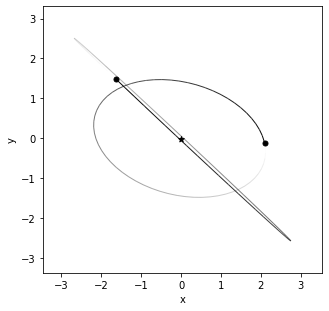

In [106]:
import rebound
import math
import numpy as np


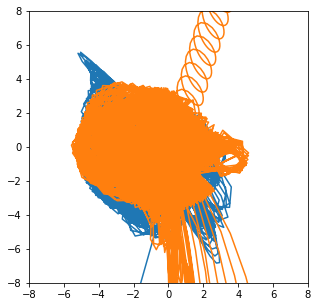

In [113]:
import numpy as np

ErisData = [1.6, 0.1163]

sim = rebound.Simulation()
sim.add(m=ErisData[0])

sim.add(m = 1.6e-2, r = 0.0100, a = 2.20, e = 0.01489, inc = 48, Omega = 50, omega = 131.89, M = 50)
sim.add(m = 1.6e-2, r = 0.0450, a = 3.7211, e = 0.01, inc = 61.25, Omega = 260, omega = 139, M = 80)

sim.move_to_com()
#sim.status()
rebound.OrbitPlot(sim)
Noutputs = 10000

year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,10000.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))

sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    
#fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-8,8])
ax.set_ylim([-8,8])
#print(x[0],y[0],x[1],y[1])
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);

/home/byu.local/djspenc/.mm_env/lib/python3.7/site-packages/rebound/plotting.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


ValueError: num must be 1 <= num <= 1, not 2

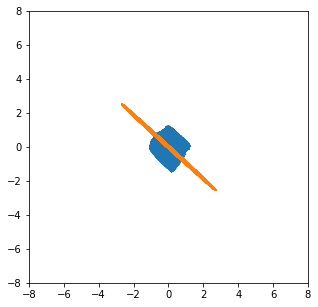

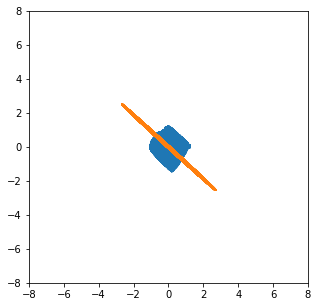

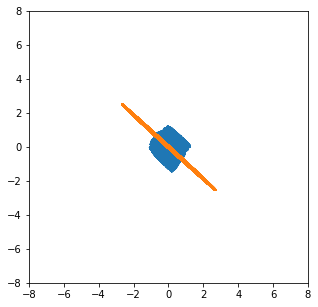

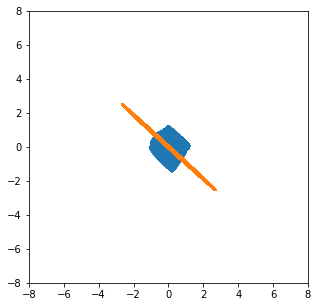

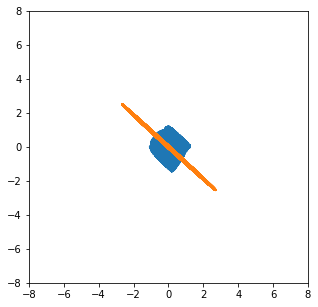

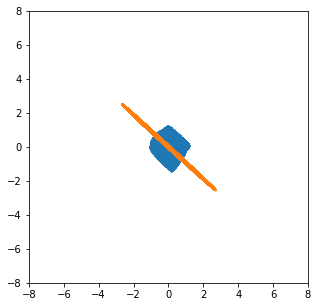

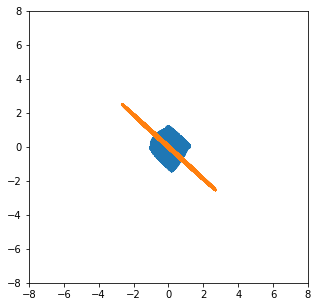

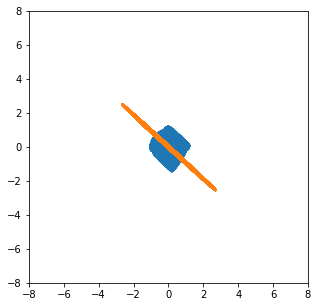

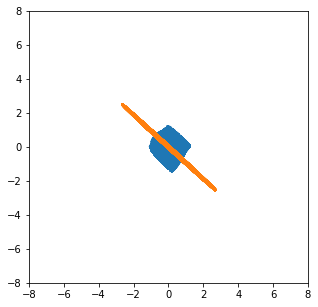

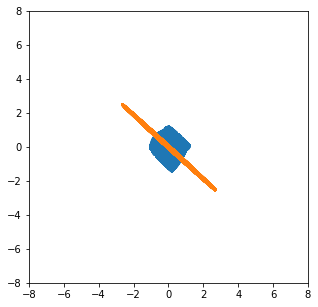

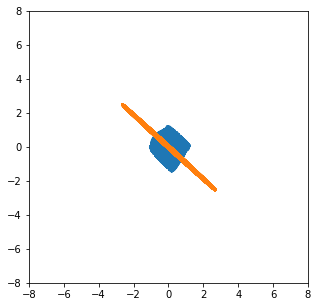

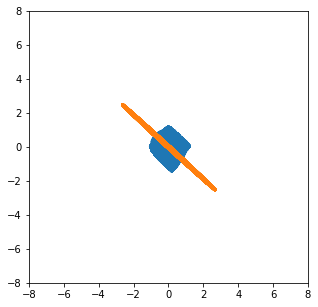

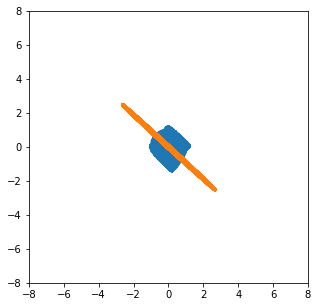

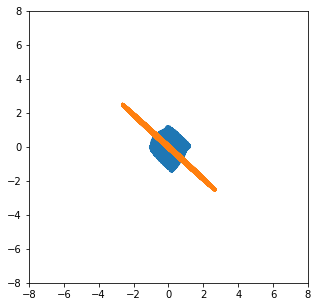

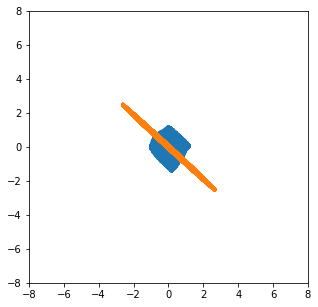

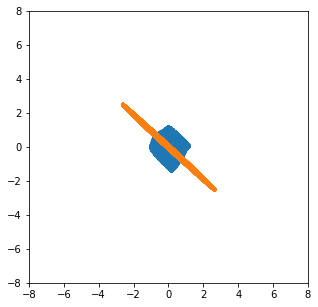

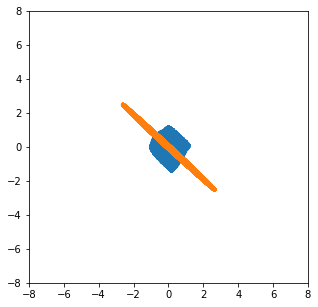

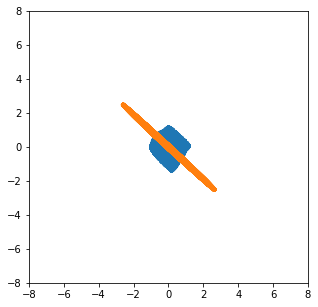

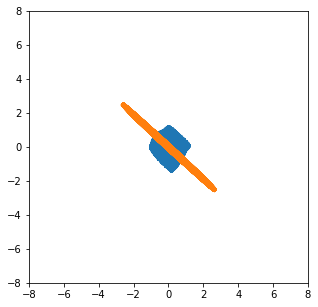

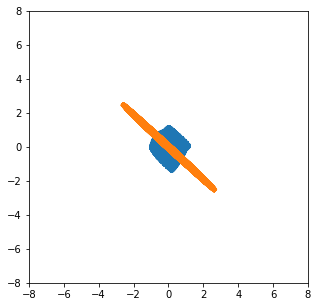

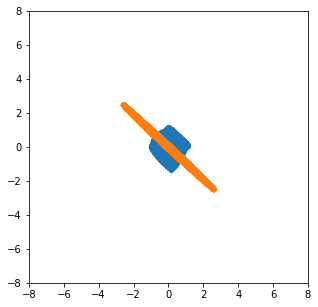

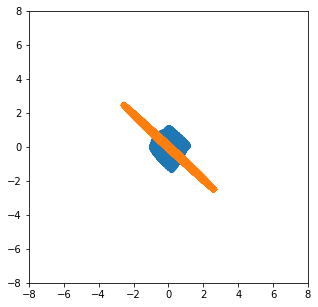

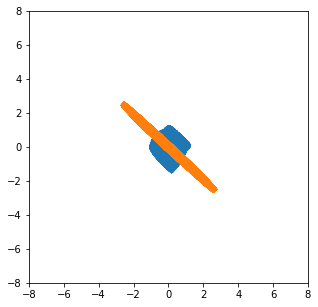

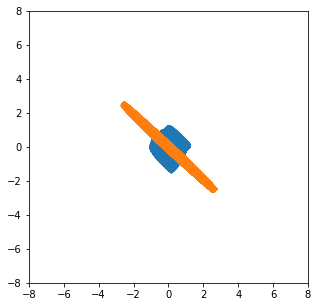

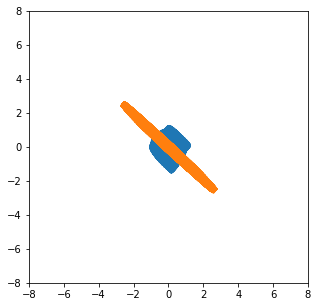

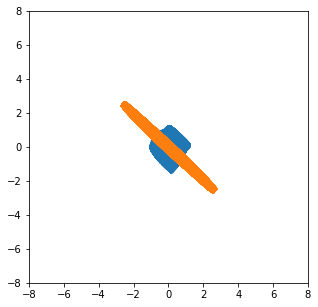

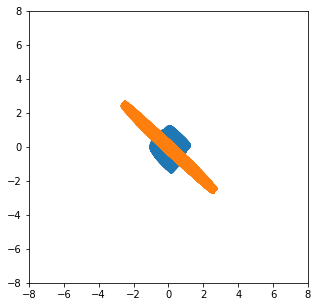

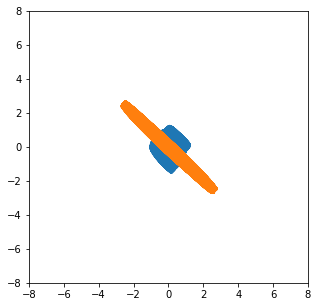

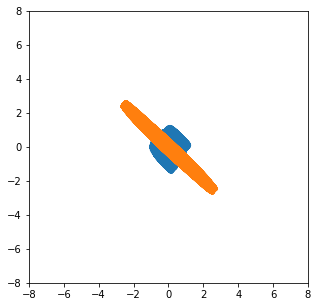

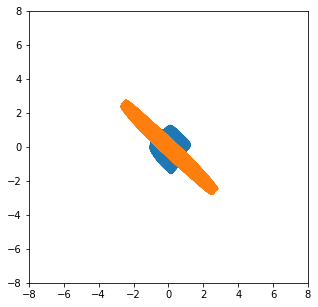

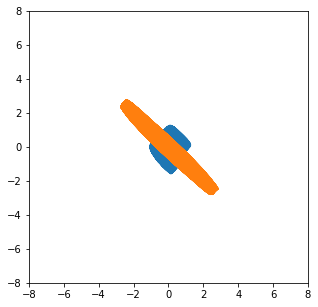

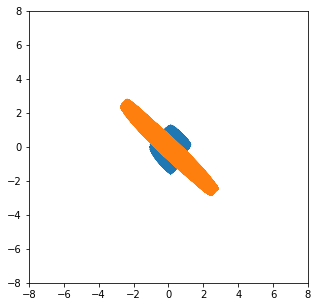

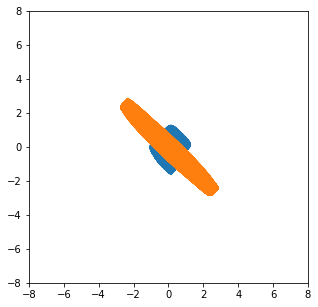

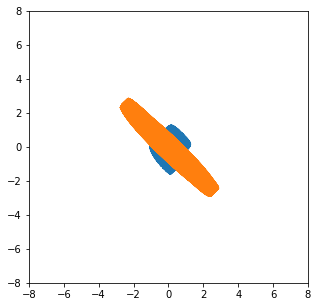

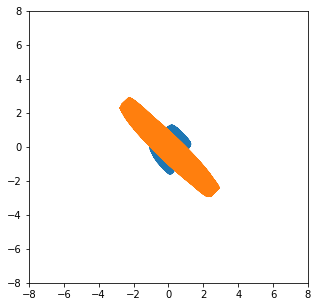

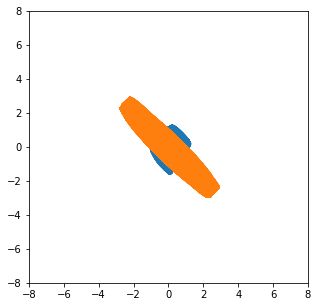

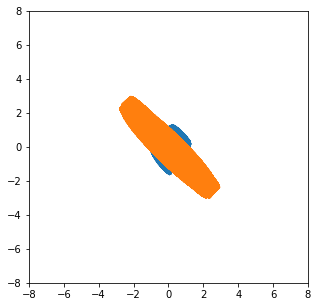

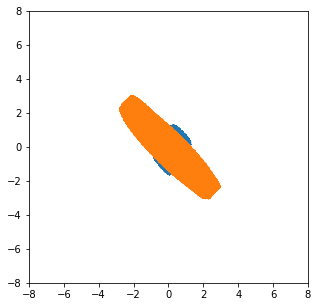

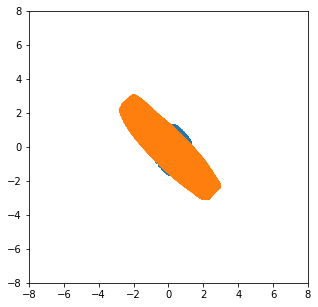

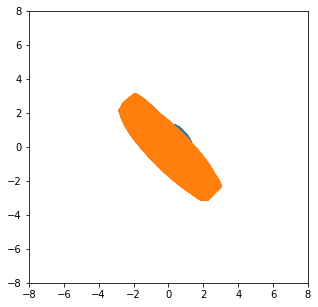

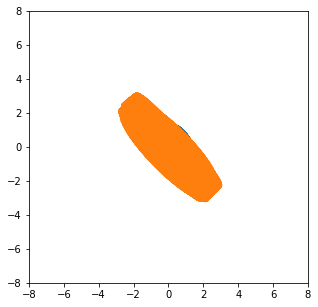

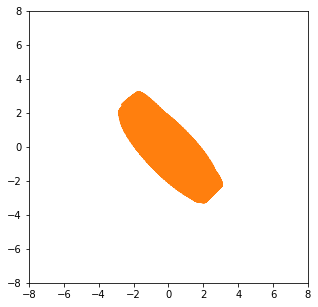

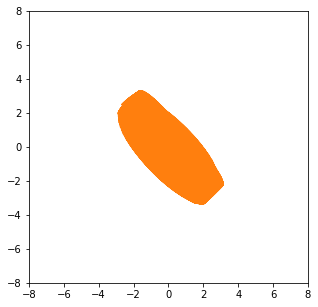

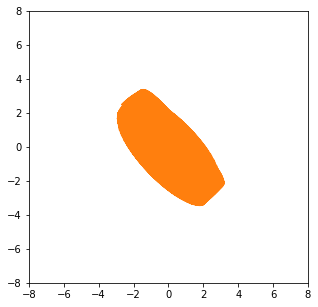

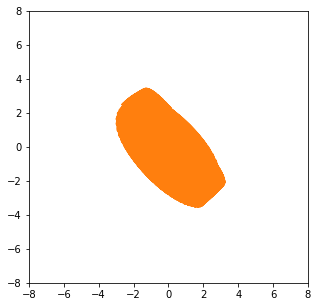

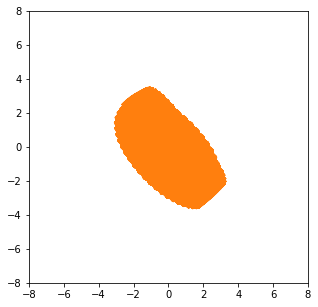

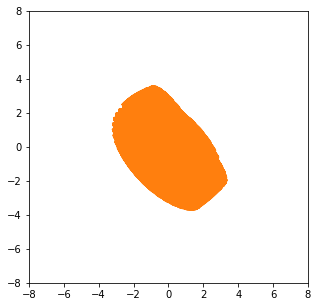

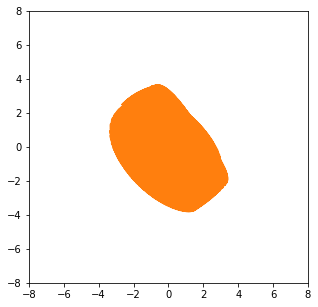

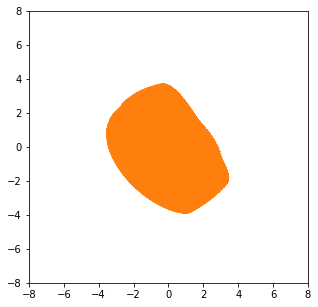

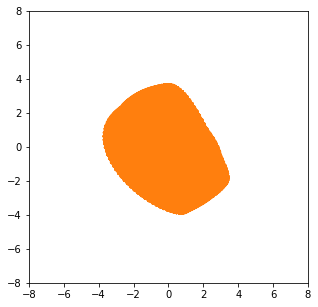

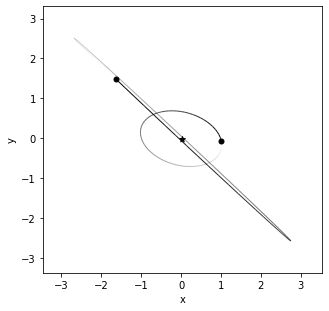

In [114]:
import numpy as np

ErisData = [1.6, 0.1163]

sims = np.zeros((50,50))
a_array = np.linspace(1.0,3.0,num=50, endpoint=True)
m_array = np.geomspace(1.6e-4,1.6e-2,num=50, endpoint=True)
for j in range(50):
    for k in range(50):
        sim = rebound.Simulation()
        sim.add(m=ErisData[0])
        a_num = a_array[j]
        m_num = m_array[k]
        sim.add(m = m_num, r = 0.0100, a = a_num, e = 0.01489, inc = 48, Omega = 50, omega = 131.89, M = 50)
        sim.add(m = 1.6e-2, r = 0.0450, a = 3.7211, e = 0.01, inc = 61.25, Omega = 260, omega = 139, M = 80)

        sim.move_to_com()
#sim.status()
        rebound.OrbitPlot(sim)
        Noutputs = 10000

        year = 2.*np.pi # One year in units where G=1
        times = np.linspace(0.,10000.*year, Noutputs)
        x = np.zeros((2,Noutputs))
        y = np.zeros((2,Noutputs))

        sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
        sim.move_to_com()        # We always move to the center of momentum frame before an integration
        ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

        for i,time in enumerate(times):
            sim.integrate(time)
            x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
            y[0][i] = ps[1].y
            x[1][i] = ps[2].x
            y[1][i] = ps[2].y
    
    #fig = plt.figure(figsize=(5,5))
        ax = plt.subplot(int(111+j))
        ax.set_xlim([-8,8])
        ax.set_ylim([-8,8])
#print(x[0],y[0],x[1],y[1])
        plt.plot(x[0], y[0]);
        plt.plot(x[1], y[1]);
        if np.sqrt(x[0][-1]**2+y[0][-1]**2) > 10.0:
            sims[j][k] = False
        elif np.sqrt(x[1][-1]**2+y[1][-1]**2) > 10.0:
            sims[j][k] = False
        else:
            sims[j][k] = True

ax = plt.subplot(10)
plt.pcolormesh(data)

In [60]:
import numpy as np
import math

data = []

tfinal = int(2 * math.pi * 100000000)

for time in np.linspace(0,tfinal,20000000):
    sim.integrate(time)
    
    xj = sim.particles[1].x
    yj = sim.particles[1].y
    
    vxj = sim.particles[1].vx
    vyj = sim.particles[1].vy
    
    
    data.append([xj,yj,vxj,vyj])
    
exportData = np.array(data)
np.savetxt('final_rebound_data6.txt',exportData)
    
    
    

In [26]:
sim.status()

---------------------------------
REBOUND version:     	3.12.2
REBOUND built on:    	Sep 17 2020 16:26:03
Number of particles: 	6
Selected integrator: 	ias15
Simulation time:     	6.0000000000000000e+03
Current timestep:    	0.003000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.4081718120776191 y=-0.40117992182428774 z=0.023296133609912173 vx=0.000260653690581515 vy=0.00017591987568723222 vz=-4.345672223850489e-06>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.6037244140523151 y=-0.8208727884754233 z=0.005955470045513425 vx=1.151960674102537 vy=-0.6186790212959128 vz=-0.15417039897244356>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.05986810534145259 y=-1.0394634167120274 z=-0.006922723417152575 vx=1.0249796894266046 vy=0.5598240248641044 vz=-0.049127273936751814>
<rebound.Particle object, m=3.040432648022642e-06 x=0.12186392019578543 y=0.4338558122524729 z=0.0213457798772935 vx=-0.8597903569949026 vy=0.5316264059483617 vz=-0.0008654998577